In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import confusion_matrix
from yellowbrick.classifier import ConfusionMatrix
from sklearn import datasets
from scipy.cluster.hierarchy import linkage, dendrogram

In [ ]:
iris = datasets.load_iris()
iris

In [8]:
def plot_clusters(data, labels, title):
  colors = ['red', 'green', 'purple', 'black']
  plt.figure(figsize=(8,4))
  for i, c, l in zip(range(-1, 3), colors, ['Noise', 'Setosa', 'Versicolor', 'Virginica']):
    plt.scatter(data[labels == i, 0],
                data[labels == i, 3],
                c=colors[i],
                label=l,
                alpha=0.5,
                s=50,
                marker='x' if i == -1 else None)
  plt.legend()
  plt.title(title)
  plt.xlabel("Comprimento Sépala")
  plt.ylabel("Largura da Pétala")
  plt.show()

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


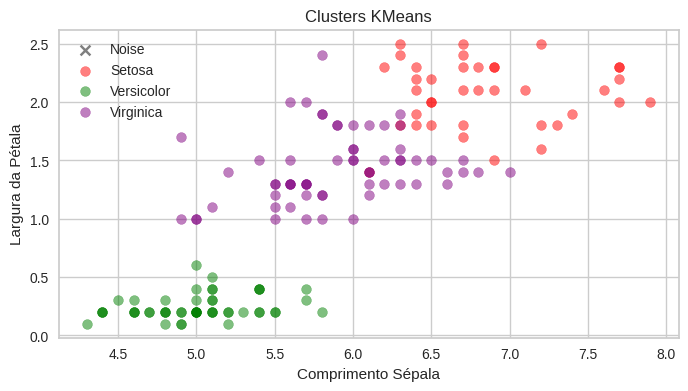

In [9]:
kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(iris.data)
print(kmeans.labels_)

plot_clusters(iris.data, kmeans.labels_, "Clusters KMeans")

In [ ]:
# confusion_matrix = ConfusionMatrix(kmeans)
# confusion_matrix.score(X_test, y_test)
# confusion_matrix.poof()

cm = confusion_matrix(iris.target, kmeans.labels_)
print(cm)

[[ 0 50  0]
 [47  0  3]
 [14  0 36]]


[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1  2  1  1  2  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  2  1  1
  1  1  2  1  1  1  1  1  1  3 -1  1 -1 -1  1  1  1  1  1  1  1 -1  3  1
  1  1  3  1  1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]


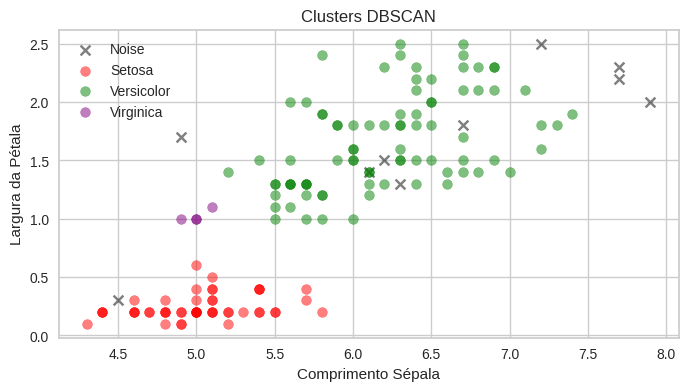

In [10]:
dbscan = DBSCAN(eps=0.5, min_samples=3)
dbscan_labels = dbscan.fit_predict(iris.data)
print(dbscan_labels)

plot_clusters(iris.data, dbscan_labels, "Clusters DBSCAN")

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


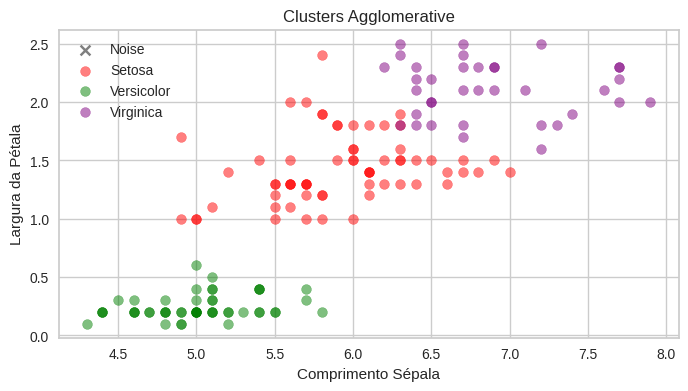

In [11]:
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(iris.data)
print(agglo_labels)

plot_clusters(iris.data, agglo_labels, "Clusters Agglomerative")

In [ ]:
cm = confusion_matrix(iris.target, agglo_labels)
print(cm)

[[ 0 50  0]
 [49  0  1]
 [15  0 35]]


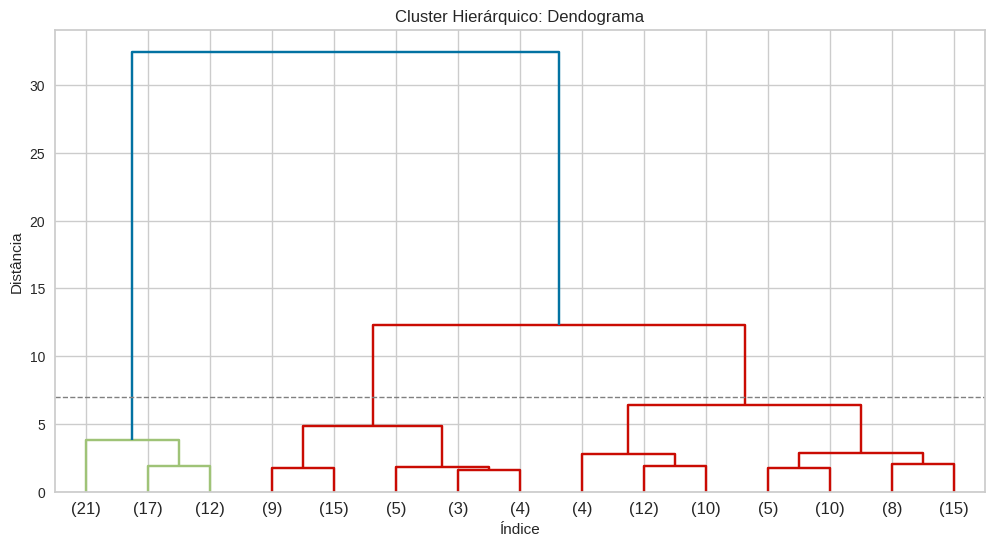

In [13]:
plt.figure(figsize=(12, 6))
plt.title("Cluster Hierárquico: Dendograma")
plt.xlabel("Índice")
plt.ylabel("Distância")
linkage_matrix = linkage(iris.data, method='ward')
dendrogram(linkage_matrix, truncate_mode='lastp', p=15)
plt.axhline(y=7, c='gray', lw=1, linestyle='dashed')